In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

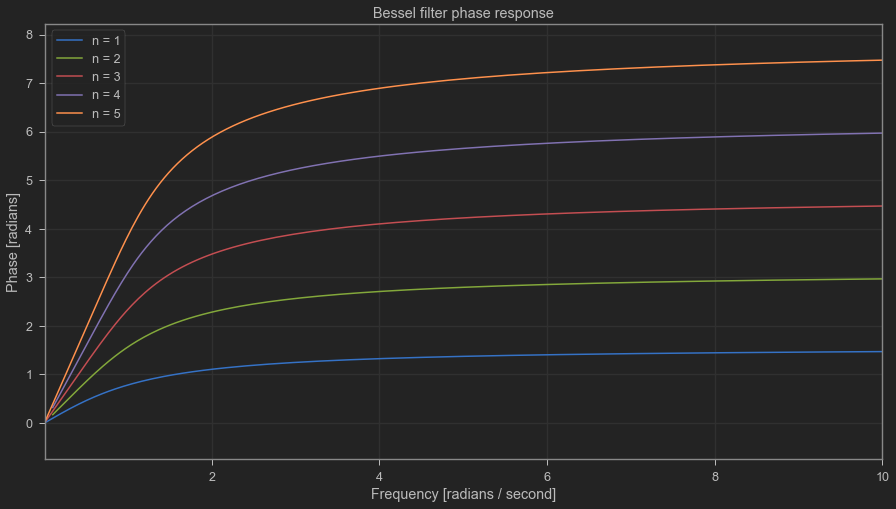

In [2]:
# Phase Response of Lowpass Bessel Filter
plt.figure(2, figsize=(15,8))
for i in range(1,6):
    b, a = sig.bessel(i, 1, 'low', analog=True, norm='phase')
    w, h = sig.freqs(b, a)
    plt.plot(w, -np.unwrap(np.angle(h)), label = 'n = {}'.format(i))

plt.title('Bessel filter phase response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Phase [radians]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.legend()
plt.show()